# Elliptic Fourier Descriptors 

In [11]:
#load all needed libraries
import numpy as np
import pandas as pd
from matplotlib import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [12]:
#loading the outline coordinates XY data
M = np.loadtxt('Gomphonema.txt')

### Equations for geting the elliptic fourier coeficients

$$a_n= \frac{T}{2\pi^{2}n²}\sum_{p=1}^K\,\frac{\Delta x_p}{\Delta t_p}\left(\cos\frac{2\pi n t_p}{T}-\cos\frac{2\pi n t_{p-1}}{T}\right)$$

$$b_n= \frac{T}{2\pi^{2}n²}\sum_{p=1}^K\,\frac{\Delta x_p}{\Delta t_p}\left(\sin\frac{2\pi n t_p}{T}-\sin\frac{2\pi n t_{p-1}}{T}\right)$$

In [13]:
#function for 
def efourier (M,n=len(M)/2):
    dfM=pd.DataFrame(M)            #fitting the data in pandas Dataframes
    Mx=pd.DataFrame(dfM[0])        
    My=pd.DataFrame(dfM[1])
    My.columns=[0]
    n=len(Mx)/2                    #number of harmonics
    p=len(Mx)                      #number of sampled points

    Dx= Mx-Mx.shift(+1)
    Dx=Dx.fillna(0)
    Dy= My-My.shift(+1)
    Dy= Dy.fillna(1)


    Dt=np.sqrt(Dx.values**2+Dy.values**2)
    t1=np.cumsum(Dt)
    t1=pd.DataFrame(t1)
    t1m1=t1.shift(+1)
    t1m1=t1m1.fillna(0)
    T=sum(Dt)

    an=np.zeros(n)
    bn=np.zeros(n)
    cn=np.zeros(n)
    dn=np.zeros(n)

    for i in range(1,n):
        an[i]=(T/(2*np.pi**2*i**2))*np.sum((Dx/Dt)*(np.cos(2*i*np.pi*t1/T)-np.cos(2*np.pi*i*t1m1/T)))                                   
        bn[i]=(T/(2*np.pi**2*i**2))*np.sum((Dx/Dt)*(np.sin(2*i*np.pi*t1/T)-np.sin(2*np.pi*i*t1m1/T)))
        cn[i]=(T/(2*np.pi**2*i**2))*np.sum((Dy/Dt)*(np.cos(2*i*np.pi*t1/T)-np.cos(2*np.pi*i*t1m1/T)))                             
        dn[i]=(T/(2*np.pi**2*i**2))*np.sum((Dy/Dt)*(np.sin(2*i*np.pi*t1/T)-np.sin(2*np.pi*i*t1m1/T)))


    ao=[2*np.sum(Mx.values*Dt/T)]
    co=[2*np.sum(My.values*Dt/T)]

    

    an=np.asarray(an)
    bn=np.asarray(bn)
    cn=np.asarray(cn)
    dn=np.asarray(dn)

    return pd.DataFrame(dict(an=an,bn=bn,cn=cn,dn=dn), columns=['an','bn','cn','dn']), ao, co, n

In [14]:
coef,ao,co,n=efourier(M) #make the dataframe with the coeficients 

### Inverse elliptic fourier equation 

$$x(t)= \frac{a_0}{2}+\sum_1^{+\infty} a_n\, \cos n \omega t+b_n\,\sin n \omega t$$

In [15]:
#functions for reverse the fourier coeficients to XY coordinates data
theta = linspace(0,2*np.pi, n+1)
theta = np.delete(theta, n, 0)

def i_seno (i):
    return np.sin(i*theta)

def i_coseno (i):
    return np.cos(i*theta)
    
def iefourier(an,bn,cn,dn,k,n,ao,co):
    hx=np.zeros((k,n))
    hy=np.zeros((k,n))
    for i in np.arange(1,k):
        hx[i,]=an[i]*i_coseno(i)+bn[i]*i_seno(i)
        hy[i,]=cn[i]*i_coseno(i)+dn[i]*i_seno(i)


    sum_hx=sum(hx,0)
    sum_hy=sum(hy,0)

    x = sum_hx+ao[0]/2
    y = sum_hy+co[0]/2
    return pd.DataFrame(dict(x=x,y=y))

In [16]:
i=2 #number of harmonic+1

coords = iefourier(coef.an,coef.bn,coef.cn,coef.dn,i,n,ao,co)            

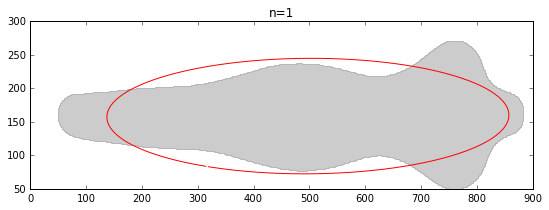

In [18]:
#ploting the original shape and the n'th-harmonic over it
plt.fill(M[:,0],M[:,1],'k', alpha=0.2)

plt.plot(coords['x'],coords['y'], 'r-')

figsize(9,3)
plt.title('n=%d'%(i-1))
#savefig('')
plt.show()

In [8]:
#generating i number of plots for each harmonic
for i in np.arange(1,50):    #range of harmonics to be ploted
    ief = iefourier(coef.an,coef.bn,coef.cn,coef.dn,i,n,ao,co)
    plt.fill(M[:,0],M[:,1],'k', alpha=0.2)

    plt.plot(ief['x'],ief['y'], 'r-')
    #plt.ylim((10,90))
    figsize(9,3)
    plt.title('n=%d'%(i-1))
    savefig('ief-%0d.png'%(i-1))
    plt.close()
    

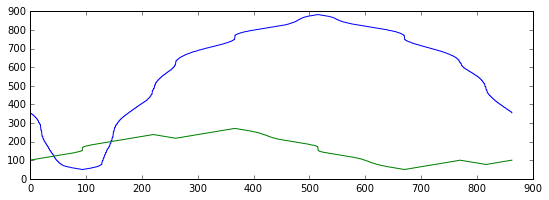